In [1]:
!nvidia-smi

Mon May  1 11:30:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd 

%cd drive/MyDrive/Colab\ Notebooks/SLMNIST/archive

/content/drive/MyDrive/Colab Notebooks/SLMNIST/archive


In [3]:
%ls
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

american_sign_language.PNG  sign_mnist_test/     sign_mnist_train.csv
amer_sign2.png              sign_mnist_test.csv
amer_sign3.png              sign_mnist_train/


In [4]:
test_labels = test_data['label']
del test_data['label']
train_labels = train_data['label']
del train_data['label']

In [5]:
test_labels

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.fit_transform(test_labels)

In [7]:
test_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [8]:
train_data = train_data.values
test_data = test_data.values

In [9]:
train_data.shape

(27455, 784)

In [10]:
test_data.shape

(7172, 784)

In [11]:
from keras.utils import to_categorical

train_data = train_data.reshape(-1, 28, 28, 1)
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape(-1, 28, 28, 1)
test_data = test_data.astype('float32') / 255

#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

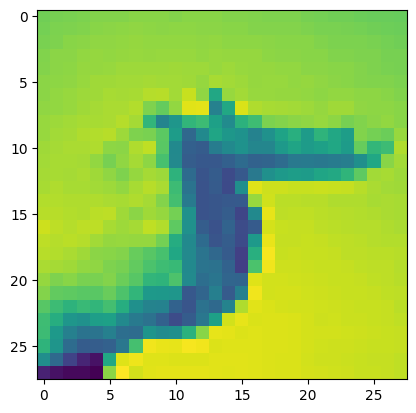

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
img_number = 568
plt.imshow(train_data[img_number])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_data)

In [14]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [15]:
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization

model = models.Sequential()
model.add(Conv2D(128, (3, 3), strides = 1 , padding = 'same', activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides = 2 , padding = 'same'))
model.add(Conv2D(64, (3, 3), strides = 1 , padding = 'same' ,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides = 2 , padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu',strides = 1 , padding = 'same' ))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides = 2 , padding = 'same'))
model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(24, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [17]:
test_labels[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
history = model.fit(datagen.flow(train_data,train_labels, batch_size = 128),
                    epochs=20,
                    validation_data = (test_data, test_labels),
                    callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 27s 54ms/step - loss: 1.5914 - accuracy: 0.6777 - val_loss: 4.4813 - val_accuracy: 0.0627 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 11s 49ms/step - loss: 0.6257 - accuracy: 0.9436 - val_loss: 1.8218 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 11s 52ms/step - loss: 0.4403 - accuracy: 0.9726 - val_loss: 0.7659 - val_accuracy: 0.8314 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 11s 51ms/step - loss: 0.3256 - accuracy: 0.9832 - val_loss: 0.5974 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 12s 58ms/step - loss: 0.2418 - accuracy: 0.9900 - val_loss: 0.2682 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 11s 51ms/step - loss: 0.2037 - accuracy: 0.9873 - val_loss: 0.4289 - val_accuracy: 0.9004 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - ETA:

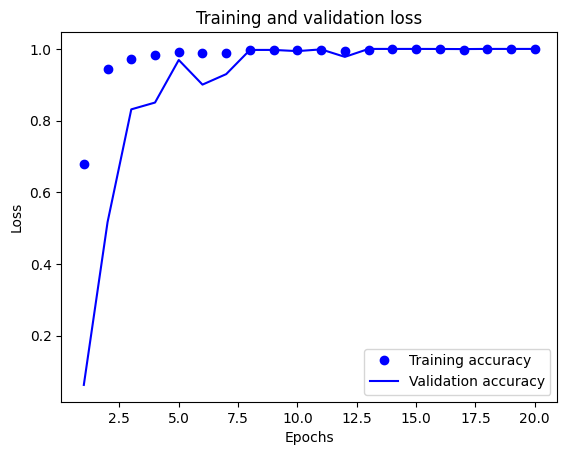

In [19]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

225/225 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 1.0000


1.0